## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results
# Combine the data into a single dataset
combined_df= mouse_metadata.merge(study_results, on='Mouse ID', how='inner')

# Display the data table for preview
combined_df.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
738,c895,Infubinol,Female,7,29,10,49.779015,0
602,b559,Naftisol,Male,20,26,5,47.409897,0
46,g791,Ramicane,Male,11,16,30,34.952583,1
706,c757,Placebo,Male,9,27,45,69.042841,3
315,j246,Capomulin,Female,21,21,25,44.555226,0
1250,n967,Zoniferol,Male,11,27,15,49.825004,1
48,g791,Ramicane,Male,11,16,40,31.369406,1
713,c766,Placebo,Female,13,26,30,60.255924,3
1802,x930,Naftisol,Male,13,26,20,52.556066,0
1736,w746,Propriva,Male,1,26,5,49.453270,0


In [2]:
# Checking the number of mice.
num_cases = len(combined_df)
print(f'Number of Cases = {num_cases}')

num_mice = len(combined_df['Mouse ID'].unique())
print(f'Number of Mice = {num_mice}')

Number of Cases = 1893
Number of Mice = 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duped_mice_id = combined_df[combined_df.duplicated(
                                                subset=['Mouse ID','Timepoint'], 
                                                keep=False)]['Mouse ID'].unique()

cleaned_combined_df = combined_df[~combined_df['Mouse ID'].isin(duped_mice_id)]


print(f'There are {len(cleaned_combined_df["Mouse ID"].unique())} Mouse IDs with non-duped Timepoints')


There are 248 Mouse IDs with non-duped Timepoints


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
unclean_df = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

print(f'There are {len(unclean_df["Mouse ID"].unique())} Mouse IDs with duped Timepoints')
unclean_df


There are 1 Mouse IDs with duped Timepoints


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[~combined_df['Mouse ID'].isin(duped_mice_id)]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
count_clean_df = len(clean_df['Mouse ID'].unique())
print(f'Number of Mice that have no Timepoint duplication: {count_clean_df}')

Number of Mice that have no Timepoint duplication: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_clean = clean_df.groupby(by=['Drug Regimen'])
clean_df_mean = grouped_clean.mean()
clean_df_median = grouped_clean.median()
clean_df_var = grouped_clean.var()
clean_df_stdev = grouped_clean.std()
clean_df_sem = grouped_clean.sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({'TumorVol Mean':clean_df_mean['Tumor Volume (mm3)'],
                                'TumorVol Median':clean_df_median['Tumor Volume (mm3)'],
                                'TumorVol Variance':clean_df_var['Tumor Volume (mm3)'],
                                 'TumorVol StdDev':clean_df_stdev['Tumor Volume (mm3)'],
                                 'TumorVol StdErr':clean_df_sem['Tumor Volume (mm3)']})


summary_stats_df


,TumorVol Mean,TumorVol Median,TumorVol Variance,TumorVol StdDev,TumorVol StdErr
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_grouped = clean_df.groupby(by='Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
df_grouped['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

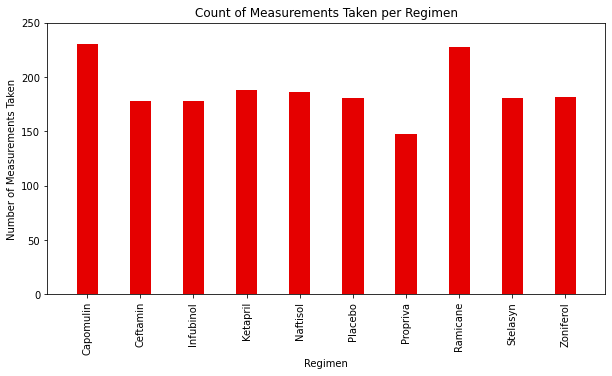

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
cmap = ListedColormap(['#e50000'])
grouped_count_byRegimen = grouped_clean['Mouse ID'].count()
fig = plt.figure(figsize = (10, 5))
count_gph = grouped_count_byRegimen.plot.bar(x=0,y=1,colormap=cmap,width=.4)

count_gph.set_xlabel('Regimen')
count_gph.set_ylabel('Number of Measurements Taken')
count_gph.set_title('Count of Measurements Taken per Regimen')

count_gph.set_ylim(0,250)
count_gph.set_xlim(-.75,9.75)

count_gph

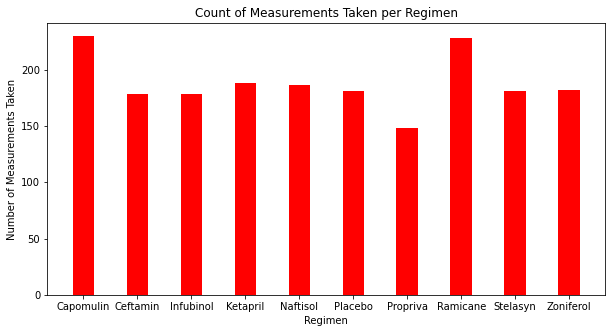

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

fig = plt.figure(figsize = (10, 5))
x_values = grouped_count_byRegimen.index.tolist()
y_values = grouped_count_byRegimen
plt.bar(x_values,y_values, color ='red', width = 0.4)

plt.xlabel("Regimen") 
plt.ylabel("Number of Measurements Taken") 
plt.title("Count of Measurements Taken per Regimen") 
plt.show() 

Text(0.5, 1.0, 'Number of Mice per Gender')

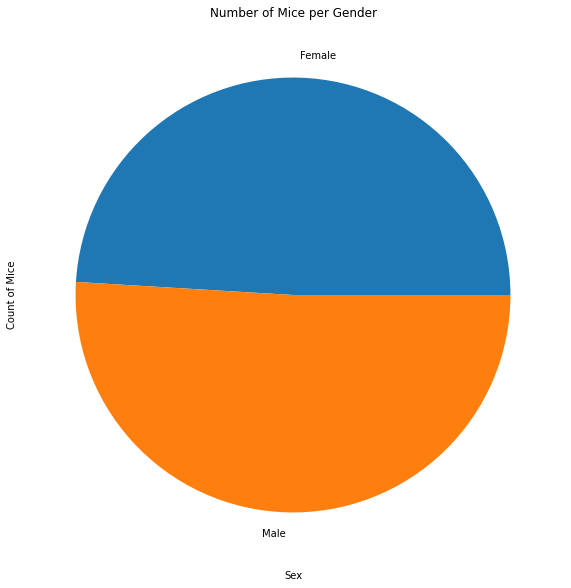

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_sex = clean_df.groupby(by=['Sex']).count()
grouped_sex_df = grouped_sex['Mouse ID']

plot = grouped_sex_df.plot.pie(figsize=(10, 10))
plot.set_xlabel('Sex')
plot.set_ylabel('Count of Mice')
plot.set_title('Number of Mice per Gender')


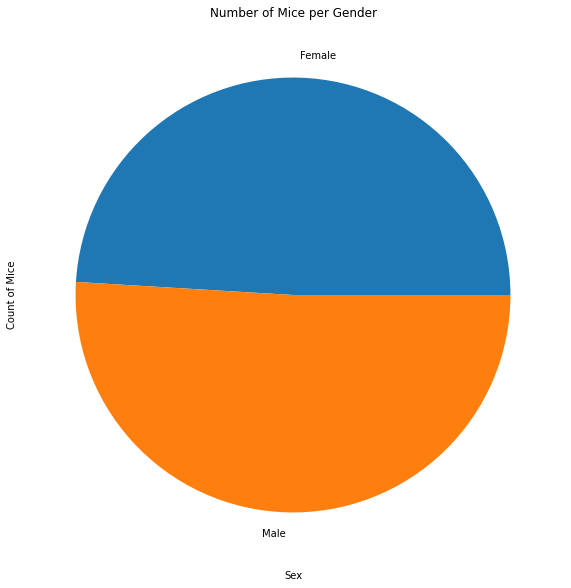

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_values = grouped_sex_df.index.tolist()
y_values = grouped_sex_df

fig = plt.figure(figsize=(10, 10)) 
plt.pie(y_values, labels=x_values)

plt.xlabel("Sex") 
plt.ylabel("Count of Mice") 
plt.title("Number of Mice per Gender") 
plt.show() 

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

filtered_df = clean_df.loc[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_timepoint_df = filtered_df[filtered_df['Timepoint'] == filtered_df.groupby('Mouse ID')['Timepoint'].transform('max')]

max_timepoint_df = max_timepoint_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)','Timepoint','Weight (g)']]
finalvol_df = max_timepoint_df.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Vol'})
finalvol_df

,Mouse ID,Drug Regimen,Final Tumor Vol,Timepoint,Weight (g)
9,k403,Ramicane,22.050126,45,16
19,s185,Capomulin,23.343598,45,17
29,x401,Capomulin,28.484033,45,15
39,m601,Capomulin,28.430964,45,17
49,g791,Ramicane,29.128472,45,16
...,...,...,...,...,...
1797,x822,Ceftamin,61.386660,45,29
1813,y163,Infubinol,67.685569,45,27
1845,y769,Ceftamin,68.594745,45,27
1855,y865,Ceftamin,64.729837,45,26


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
data = finalvol_df['Final Tumor Vol']
IQR = st.iqr(data, interpolation = 'midpoint') 
data_median = data.median()  

upper_bound = data_median + (.5*IQR)
lower_bound = data_median - (.5*IQR)

print(f'IQR: {round(IQR,4)}')
print(f'Upper Bound: {round(upper_bound,4)}')
print(f'Lower Bound: {round(lower_bound,4)}')

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
outliers=[]

upper_df = finalvol_df.loc[(finalvol_df["Final Tumor Vol"] > upper_bound)]
lower_df = finalvol_df.loc[(finalvol_df["Final Tumor Vol"] < lower_bound)]
outliers.append(upper_df)
outliers.append(lower_df)




IQR: 22.8587
Upper Bound: 56.4294
Lower Bound: 33.5706


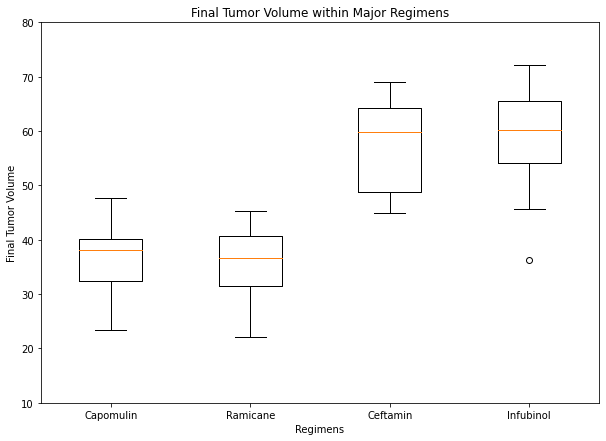

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig = plt.figure(figsize =(10, 7)) 

capomulin_vol = finalvol_df.loc[finalvol_df['Drug Regimen'] == 'Capomulin']['Final Tumor Vol']
ramicane_vol = finalvol_df.loc[finalvol_df['Drug Regimen'] == 'Ramicane']['Final Tumor Vol']
ceftamin_vol = finalvol_df.loc[finalvol_df['Drug Regimen'] == 'Ceftamin']['Final Tumor Vol']
infubinol_vol = finalvol_df.loc[finalvol_df['Drug Regimen'] == 'Infubinol']['Final Tumor Vol']

# Creating plot 
data_to_plot = [capomulin_vol,ramicane_vol,ceftamin_vol,infubinol_vol]
box_plot = plt.boxplot(data_to_plot) 
xticks = ['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol']
plt.xticks([1,2,3,4],xticks)
# show/format plot 
plt.title('Final Tumor Volume within Major Regimens')
plt.xlabel('Regimens')
plt.ylabel('Final Tumor Volume')

plt.ylim(10,80)
plt.xlim(0.5,4.5)

plt.show()

## Line and Scatter Plots

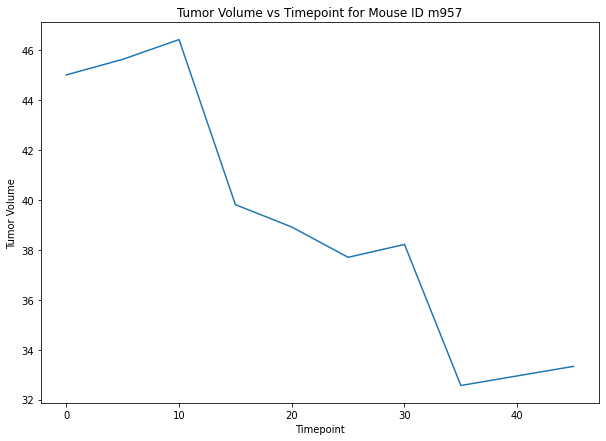

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
fig = plt.figure(figsize =(10, 7)) 

y_value = clean_df.loc[clean_df['Mouse ID'] == 'm957']['Tumor Volume (mm3)']
x_value = clean_df.loc[clean_df['Mouse ID'] == 'm957']['Timepoint']

plt.plot(x_value,y_value)
plt.title('Tumor Volume vs Timepoint for Mouse ID m957')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

[15. 17. 19. 20. 21. 22. 23. 24. 25.]
[36.18203956 37.2141325  41.18239136 39.14105275 42.08870003 43.28848977
 43.34105085 44.80580968 44.06210875]


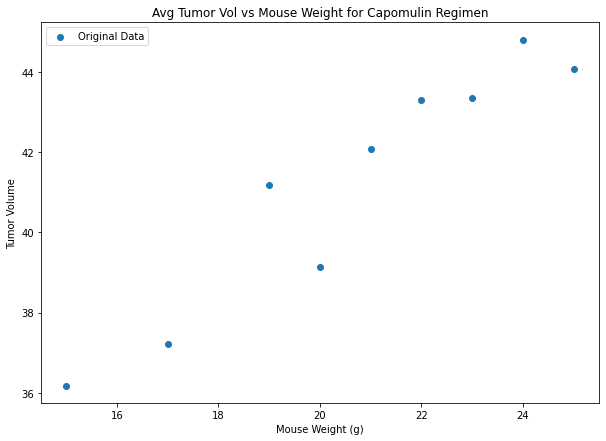

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig = plt.figure(figsize =(10, 7)) 

filtered_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

y_list = filtered_df.groupby(by=['Weight (g)'])['Tumor Volume (mm3)'].mean()
y = np.array(y_list)
x_str = y_list.index.tolist()
x = np.array([float(i) for i in x_str])
print(x)
print(y)
plt.scatter(x,y,label='Original Data')

plt.title('Avg Tumor Vol vs Mouse Weight for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume')

plt.legend()
plt.show()


## Correlation and Regression

Correlation Coefficient = 0.894772609734063
 
Regression Statistics
_______________________________________________

Intercept = 22.764229983591896
r-value = 0.950524396185527
p-value = 8.449451040646223e-05
Standard Error = 0.1105278286274132


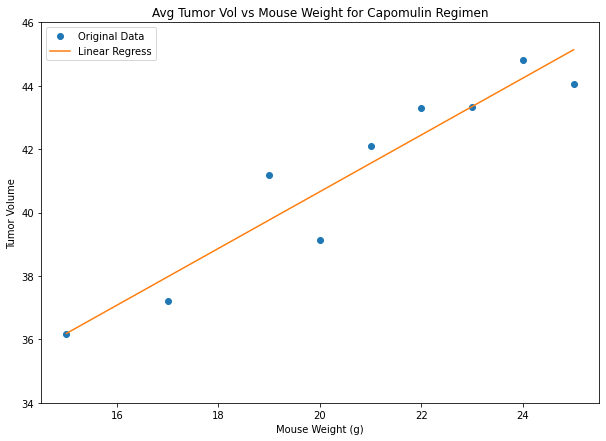

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(x,y)

fig = plt.figure(figsize =(10, 7)) 

print(f'Correlation Coefficient = {slope}')
print(" ")
print("Regression Statistics")
print("_______________________________________________")
print("")
print(f'Intercept = {intercept}')
print(f'r-value = {r_value}')
print(f'p-value = {p_value}')
print(f'Standard Error = {std_err}')

#plt.scatter(x_vals, lr[0]*x_vals + lr[1])


plt.plot(x, y, 'o', label='Original Data')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,label='Linear Regress')

plt.ylim(34,46)
plt.title('Avg Tumor Vol vs Mouse Weight for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume')

#plt.plot(x, intercept + slope * 2, 'r', label='Linear Regress')
plt.legend()
plt.show()